# 图像特征提取与描述

## 1. 理解图像特征

- 要寻找图像一些唯一的特征，这些特征要适于被跟踪，容易被比较
- 角点是一个好的图像特征
- 找到图像特征的技术被称为特征检测
- 计算机也要对特征周围的区域进行描述，这样它才能在其他图像中找到相同的特征。我们把这种描述称为特征描述
    - 当有了特征很它们的描述后，你就可以在所有的图像中找这个相同的特征了

## 2. Harris角点检测

- 角点的一个特性：窗口向任何方向移动，变化都很大
    - 窗口函数可以是正常的矩形窗口也可以是对每一个像素给予不同权重的高斯窗口
- 函数cv2.cornerHarris(img, blockSize, ksize, k)
    - img - 数据类型为 float32 的输入图像
    - blockSize - 角点检测中要考虑的领域大小
    - ksize - Sobel 求导中使用的核的大小（一般取3*3）
    - k - Harris 角点检测方程中的自由参数，取值参数为 [0,04， 0.06]
- 更精确的亚像素级精度的角点
    - cv2.cornerSubPix(image, corners, winSize, zeroZone, criteria)

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img = cv2.imread('image/building.PNG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)

# 输入图形必须是float32格式，最后一个参数在0.04-0.06之间
dst = cv2.cornerHarris(gray, 2, 3, 0.05)

# 结果会扩大以标记拐角，不重要
dst = cv2.dilate(dst, None)

# 阈值为最佳值，可能因图像而异
img[dst>0.01*dst.max()] = [0, 0, 255]

cv2.imshow('dst', img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

## 3. Shi-Tomasi 角点检测 & 适合于跟踪的图像特征

- cv2.goodFeaturesToTrack(): 使用 Shi-Tomasi 方法获取图像中 N 个最好的角点
    - 输入图像
    - 要检测的角点数目
    - 角点质量水平：0-1，它代表角点的最低质量
    - 两个角点之间的最短欧氏距离

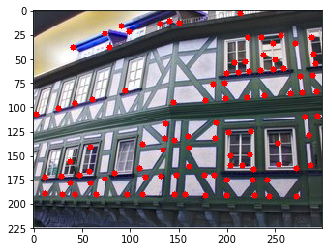

In [15]:
img = cv2.imread('image/building.PNG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.005, 10)
# print(corners)
# 返回的结果是双层括号的数组[[[248.  61.]] [[ 95.  83.]]... [[294. 109.]]]
corners = np.int0(corners)
# print(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)
plt.imshow(img)
plt.show()


## 4.SIFT(Scale-Invariant Feature Transform)尺度不变特征变换

- SIFT算法可以帮助我们提取图像中的关键点并计算它们的描述符
- SIFT 算法主要由四步构成
    - 尺度空间极值检测
        - 在不同的尺度空间不能使用相同的窗口检测极值点。对小的角点要用小的窗口，对大的角点只能使用大的窗口
        - 为了达到这个目的我们要使用尺度空间滤波器
            - 尺度空间滤波器可以使用一些列具有不同方差 σ 的高斯卷积核构成
    - 关键点（极值点）定位
    - 为关键点（极值点）指定方向参数
    - 关键点描述符
    - 关键点匹配
- opencv中的SIFT

In [23]:
img = cv2.imread('image/building.PNG')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(gray, None)

img = cv2.drawKeypoints(gray, keypoints)

img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)


error: OpenCV(4.0.0) C:\projects\opencv-python\opencv_contrib\modules\xfeatures2d\src\sift.cpp:1207: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SIFT::create'


## 5. SURF（加速稳健特征）算法

- SURF（加速稳健特征）算法是加速版的 SIFT
- 

## 6. 角点检测的FAST算法


In [38]:
img = cv2.imread('image/boatGray.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initiate FAST object with default values
fast = cv2.cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img, None)
img2 = cv2.drawKeyPoints(img, kp, color=(255,0,0))

# Print all default params
print("Threshold: ", fast.getInt('threshold'))
print("nonmaxSuppression: ", fast.getBool('nonmaxSuppression'))
print( "neighborhood: ", fast.getInt('type'))
print("Total Keypoints with nonmaxSuppression: ", len(kp))
cv2.imwrite('fast_true.png',img2)

# Disable nonmaxSuppression
fast.setBool('nonmaxSuppression',0)
kp = fast.detect(img,None)
print("Total Keypoints without nonmaxSuppression: ", len(kp))
img3 = cv2.drawKeypPoints(img, kp, color=(255,0,0))
cv2.imwrite('fast_false.png',img3)

AttributeError: module 'cv2.cv2' has no attribute 'drawKeyPoints'

## ORB(Oriented FAST and Rotated BRIEF)算法

- 匹配效率以及更主要的是专利问题方面 ORB 算法是是 SIFT 和 SURF 算法的一个很好的替代品
- ORB 基本是 FAST 关键点检测和 BRIEF 关键点描述器的结合体

In [39]:
img = cv2.imread('image/boatGray.bmp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initiate STAR detector
orb = cv2.ORB()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img,kp,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()

TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)